In [2]:
import tensorflow as tf
import numpy as np

In [3]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0

In [4]:
## Regular Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/5
60000/60000 [==============================] - 4s 58us/sample - loss: 0.5013 - acc: 0.8225
Epoch 2/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3738 - acc: 0.8656
Epoch 3/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3368 - acc: 0.8774
Epoch 4/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3139 - acc: 0.8845
Epoch 5/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2961 - acc: 0.8903


In [19]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [22]:
# Model ran for longer but slight improvement in accuracy. This is well prononced for complex inputs
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Epoch 1/5
60000/60000 [==============================] - 23s 378us/sample - loss: 0.4336 - acc: 0.8418
Epoch 2/5
60000/60000 [==============================] - 22s 372us/sample - loss: 0.2914 - acc: 0.8915
Epoch 3/5
60000/60000 [==============================] - 22s 373us/sample - loss: 0.2457 - acc: 0.9082
Epoch 4/5
60000/60000 [==============================] - 23s 384us/sample - loss: 0.2140 - acc: 0.9190
Epoch 5/5
10000/10000 [==============================] - 1s 108us/sample - loss: 0.2696 - acc: 0.9028
0.9028


In [24]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


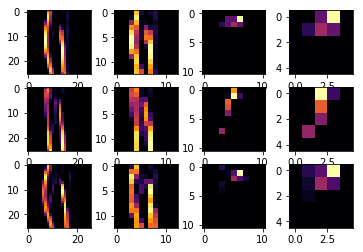

In [26]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=2
SECOND_IMAGE=3
THIRD_IMAGE=5
CONVOLUTION_NUMBER = 2
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [37]:
test_images[1].shape

(28, 28, 1)

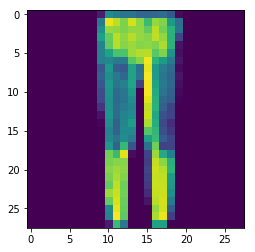

In [42]:
plt.imshow(test_images[3].reshape(28,28))

In [18]:
### Adding additional convolutional layer accuracy decreased
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Epoch 1/5
60000/60000 [==============================] - 23s 382us/sample - loss: 0.5885 - acc: 0.7828
Epoch 2/5
60000/60000 [==============================] - 23s 377us/sample - loss: 0.3933 - acc: 0.8555
Epoch 3/5
60000/60000 [==============================] - 23s 376us/sample - loss: 0.3329 - acc: 0.8773
Epoch 4/5
60000/60000 [==============================] - 22s 373us/sample - loss: 0.2996 - acc: 0.8886
Epoch 5/5
10000/10000 [==============================] - 1s 111us/sample - loss: 0.3234 - acc: 0.8848
0.8848


In [43]:
### Removing convolutions keeping only one  - Accuracy increased
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Epoch 1/5
60000/60000 [==============================] - 18s 296us/sample - loss: 0.3805 - acc: 0.8648
Epoch 2/5
60000/60000 [==============================] - 17s 291us/sample - loss: 0.2561 - acc: 0.9078
Epoch 3/5
60000/60000 [==============================] - 17s 288us/sample - loss: 0.2134 - acc: 0.9203
Epoch 4/5
60000/60000 [==============================] - 17s 289us/sample - loss: 0.1797 - acc: 0.9335
Epoch 5/5
10000/10000 [==============================] - 1s 87us/sample - loss: 0.2542 - acc: 0.9151
0.9151


In [44]:
### Removing convolutions keeping only one with 32 conv filters  - Accuracy is almost same
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Epoch 1/5
60000/60000 [==============================] - 12s 205us/sample - loss: 0.3959 - acc: 0.8584
Epoch 2/5
60000/60000 [==============================] - 12s 202us/sample - loss: 0.2673 - acc: 0.9031
Epoch 3/5
60000/60000 [==============================] - 12s 205us/sample - loss: 0.2225 - acc: 0.9184
Epoch 4/5
60000/60000 [==============================] - 12s 203us/sample - loss: 0.1909 - acc: 0.9292
Epoch 5/5
10000/10000 [==============================] - 1s 68us/sample - loss: 0.2429 - acc: 0.9167
0.9167


In [45]:
## Call Back with conv

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.85):
      print("\nReached 85% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


model.fit(training_images, training_labels, epochs=5,callbacks=[callbacks])
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Epoch 1/5
60000/60000 [==============================] - 22s 370us/sample - loss: 0.4380 - acc: 0.8415
Epoch 2/5
59840/60000 [============================>.] - ETA: 0s - loss: 0.2922 - acc: 0.8929
Reached 60% accuracy so cancelling training!
10000/10000 [==============================] - 1s 113us/sample - loss: 0.3034 - acc: 0.8870
0.887
